# Enhanced Insurance Claims Data Analysis

This notebook provides detailed analysis of insurance claims data with:
- Comprehensive data visualization
- Statistical analysis
- Pattern discovery
- Feature relationships

In [35]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set basic plot styles
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True
sns.set_theme(style="whitegrid")

## 1. Data Loading and Initial Examination

In [36]:
# Load data
df = pd.read_csv("Cleaned_Patient_Records.csv")
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Dataset Shape: (3667, 36)
Columns: ['SettlementValue', 'AccidentType', 'Injury_Prognosis', 'SpecialHealthExpenses', 'SpecialReduction', 'SpecialOverage', 'GeneralRest', 'SpecialAdditionalInjury', 'SpecialEarningsLoss', 'SpecialUsageLoss', 'SpecialMedications', 'SpecialAssetDamage', 'SpecialRehabilitation', 'SpecialFixes', 'GeneralFixed', 'GeneralUplift', 'SpecialLoanerVehicle', 'SpecialTripCosts', 'SpecialJourneyExpenses', 'SpecialTherapy', 'Exceptional_Circumstances', 'Minor_Psychological_Injury', 'Dominant injury', 'Whiplash', 'Vehicle Type', 'Weather Conditions', 'Accident Date', 'Vehicle Age', 'Driver Age', 'Number of Passengers', 'Accident Description', 'Injury Description', 'Police Report Filed', 'Witness Present', 'Gender', 'duration_days']


,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Accident Date,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender,duration_days
0,520.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-11-10 11:22:24.508901,13.0,33.0,4.0,0,0,0,0,0,214.0
1,870.0,0,1,0.0,0.0,0.0,520.0,0.0,0.0,90.0,...,2023-06-25 00:55:01.140228,4.0,45.0,2.0,0,1,0,0,1,198.0
2,2140.0,1,2,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,...,2020-02-23 17:43:47.805561,9.0,45.0,4.0,1,0,0,1,1,7.0
3,520.0,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-10-02 04:36:32.118423,5.0,62.0,1.0,0,1,0,0,1,11.0
4,260.0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-04-02 05:13:07.117423,9.0,78.0,1.0,1,2,0,0,2,12.0


## 2. Statistical Analysis

Basic Statistics:
       SettlementValue  AccidentType  Injury_Prognosis  SpecialHealthExpenses  \
count      3667.000000   3667.000000       3667.000000            3667.000000   
mean       1206.249343      2.699209          4.734115               4.001364   
std         826.772056      3.929175          3.525055              93.711437   
min         240.000000      0.000000          0.000000               0.000000   
25%         670.000000      0.000000          2.000000               0.000000   
50%         988.000000      0.000000          5.000000               0.000000   
75%        1504.400000      6.000000          7.000000               0.000000   
max        7862.900000     18.000000         21.000000            3024.000000   

       SpecialReduction  SpecialOverage  GeneralRest  SpecialAdditionalInjury  \
count            3667.0     3667.000000  3667.000000              3667.000000   
mean                0.0       14.136809   467.769689                 0.349032   
std      

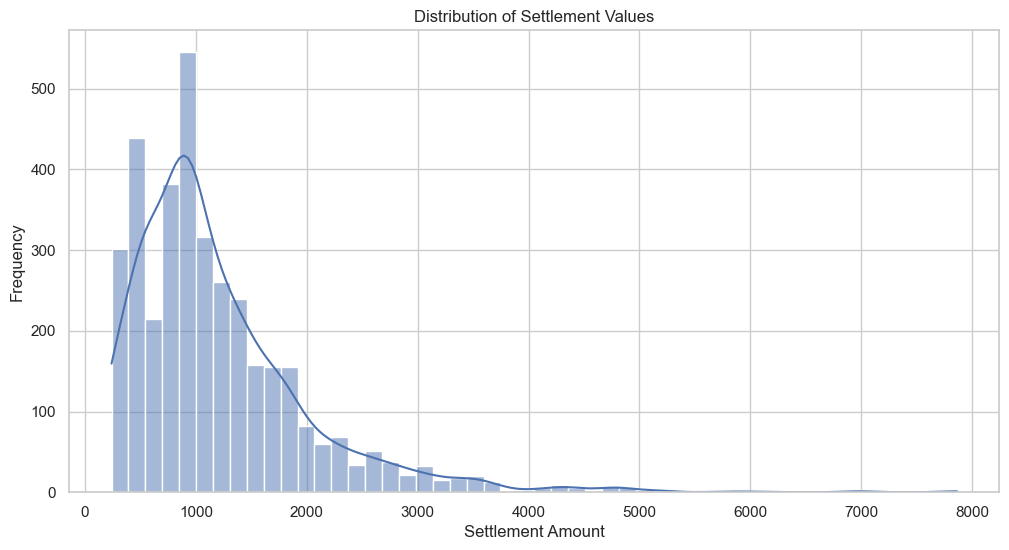

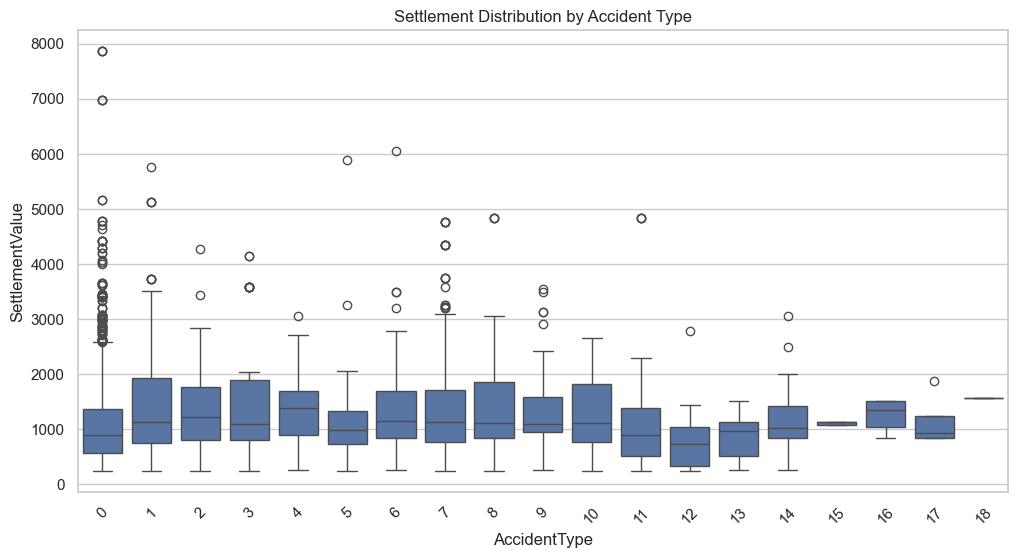

In [37]:
# Basic statistics and distributions
print("Basic Statistics:")
print(df.describe())

# Distribution of Settlement Values
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='SettlementValue', bins=50, kde=True)
plt.title('Distribution of Settlement Values')
plt.xlabel('Settlement Amount')
plt.ylabel('Frequency')
plt.show()

# Box plot of settlements by accident type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='AccidentType', y='SettlementValue')
plt.title('Settlement Distribution by Accident Type')
plt.xticks(rotation=45)
plt.show()

## 3. Enhanced Feature Analysis

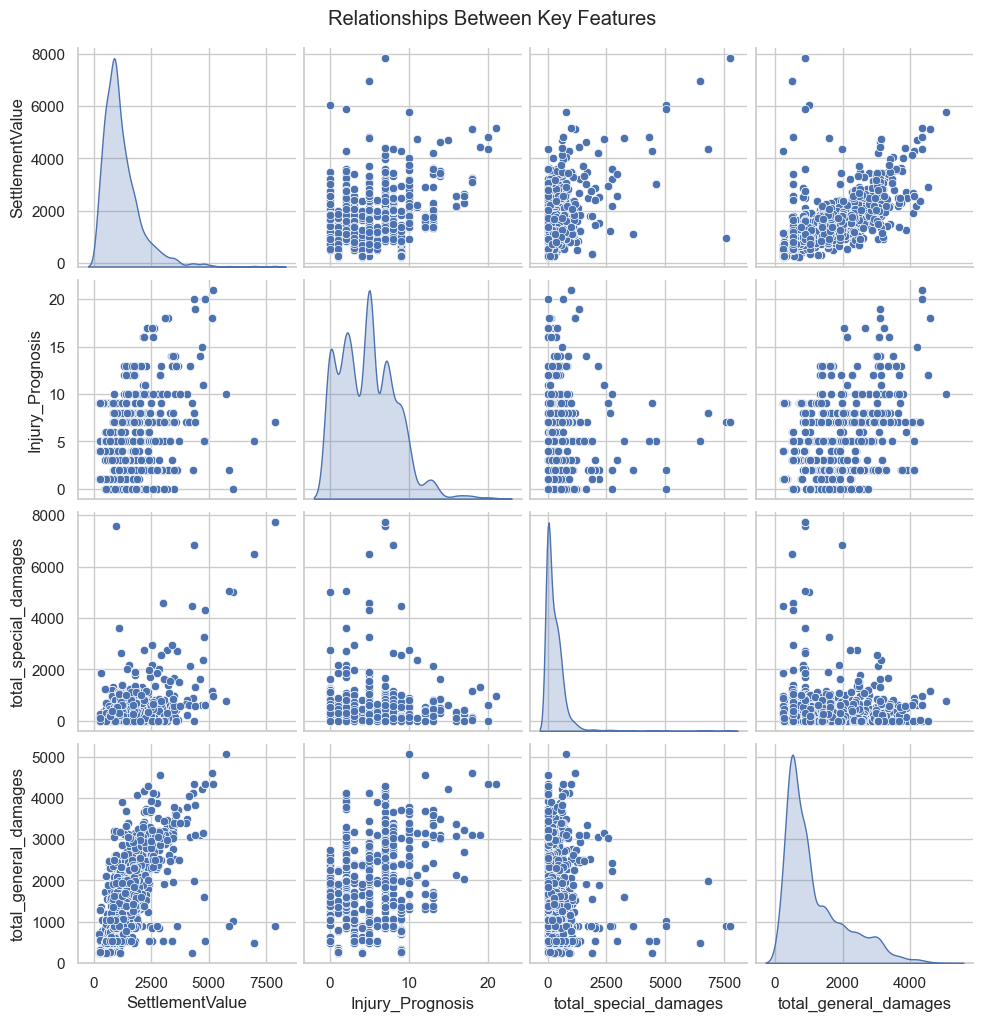

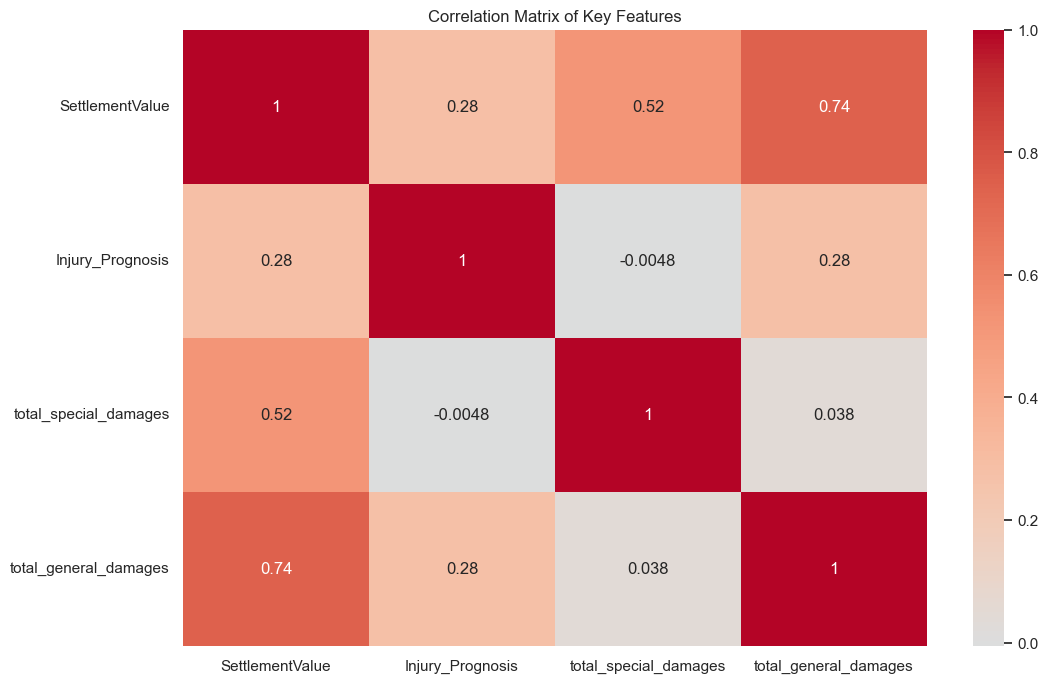

In [38]:
# Create composite features
# First create total damages
df['total_damages'] = df[[col for col in df.columns if col.startswith('Special') or col.startswith('General')]].sum(axis=1)

# Then create special and general damages separately
df['total_special_damages'] = df[[col for col in df.columns if 'Special' in col]].sum(axis=1)
df['total_general_damages'] = df[[col for col in df.columns if 'General' in col]].sum(axis=1)

# Create damage severity ratio with protection against division by zero
df['damage_severity_ratio'] = df['total_damages'] / df['Injury_Prognosis'].replace(0, 1)

# Handle infinite values and very large numbers
df = df.replace([np.inf, -np.inf], np.nan)

# Fill NaN values for numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Scatter plot matrix of key features
key_features = ['SettlementValue', 'Injury_Prognosis', 'total_special_damages', 'total_general_damages']
sns.pairplot(df[key_features], diag_kind='kde')
plt.suptitle('Relationships Between Key Features', y=1.02)
plt.show()

# Correlation analysis with heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[key_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Features')
plt.show()

## 4. Advanced Temporal Analysis

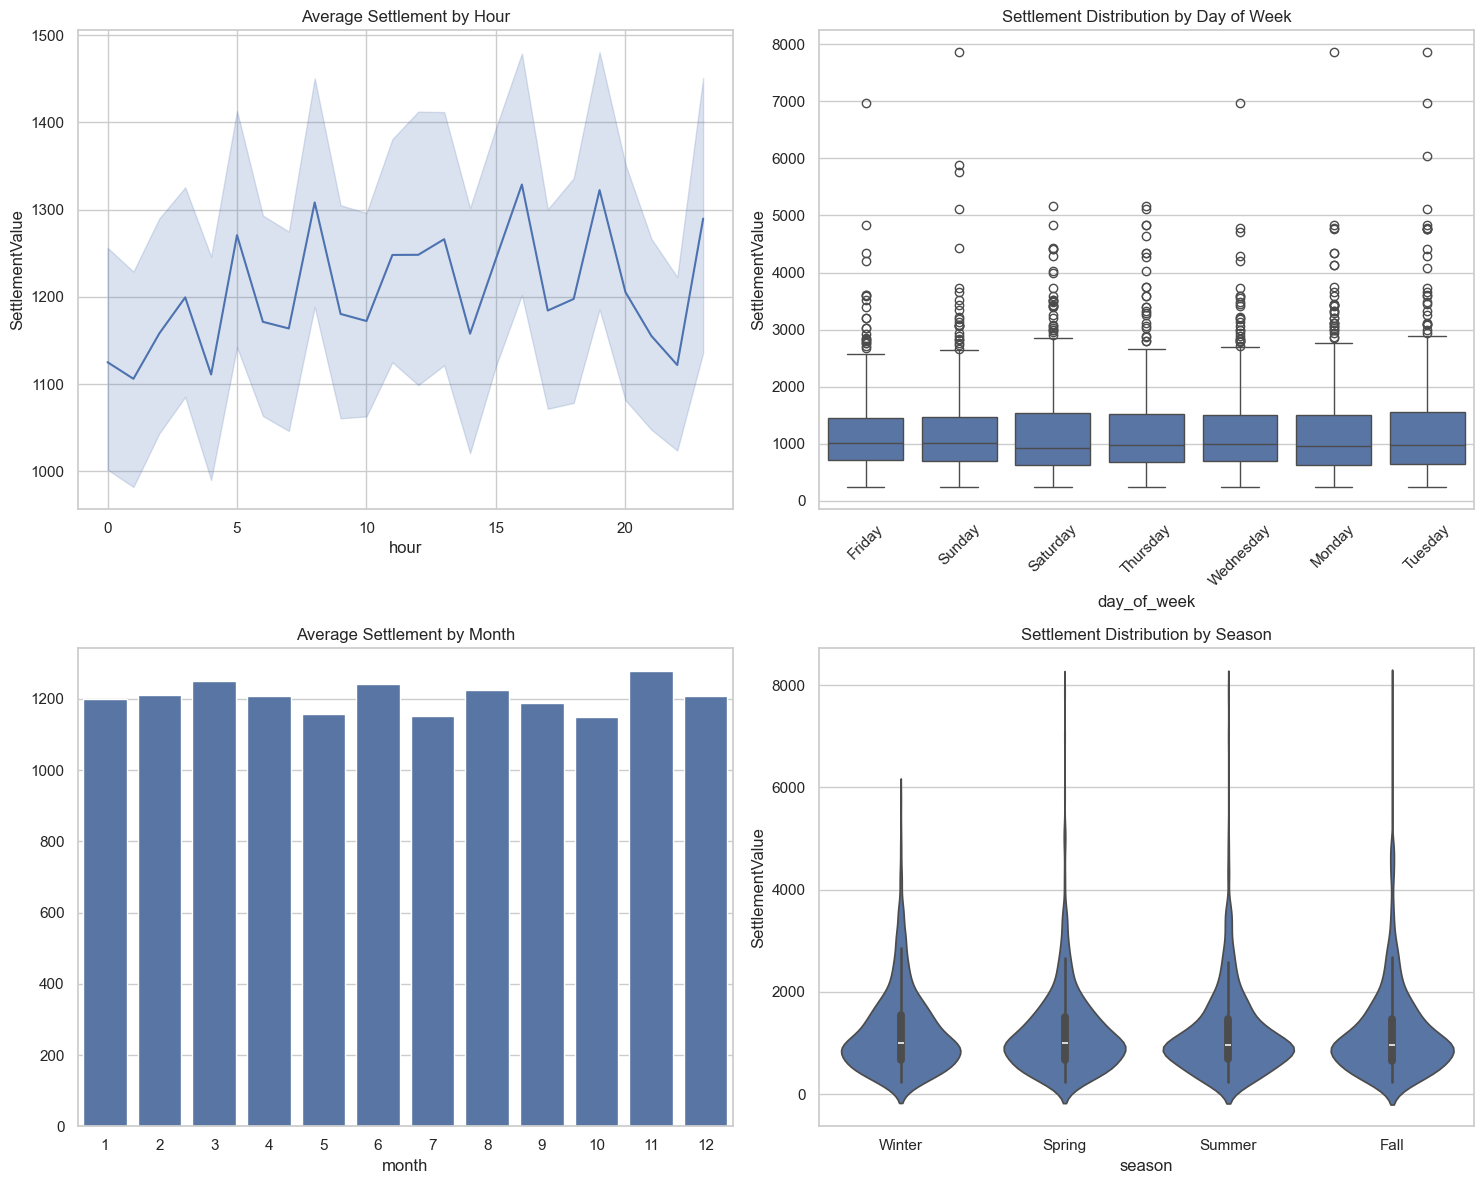

In [39]:
# Convert to datetime
df['Accident Date'] = pd.to_datetime(df['Accident Date'])

# Extract temporal features
df['hour'] = df['Accident Date'].dt.hour
df['day_of_week'] = df['Accident Date'].dt.day_name()
df['month'] = df['Accident Date'].dt.month
df['season'] = pd.cut(df['Accident Date'].dt.month, bins=[0,3,6,9,12], labels=['Winter', 'Spring', 'Summer', 'Fall'])

# Create subplots for temporal patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Average settlement by hour
sns.lineplot(data=df, x='hour', y='SettlementValue', ax=axes[0,0])
axes[0,0].set_title('Average Settlement by Hour')

# Average settlement by day of week
sns.boxplot(data=df, x='day_of_week', y='SettlementValue', ax=axes[0,1])
axes[0,1].set_title('Settlement Distribution by Day of Week')
axes[0,1].tick_params(axis='x', rotation=45)

# Average settlement by month
monthly_avg = df.groupby('month')['SettlementValue'].mean()
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, ax=axes[1,0])
axes[1,0].set_title('Average Settlement by Month')

# Settlement distribution by season
sns.violinplot(data=df, x='season', y='SettlementValue', ax=axes[1,1])
axes[1,1].set_title('Settlement Distribution by Season')

plt.tight_layout()
plt.show()

## 5. Injury and Damage Analysis

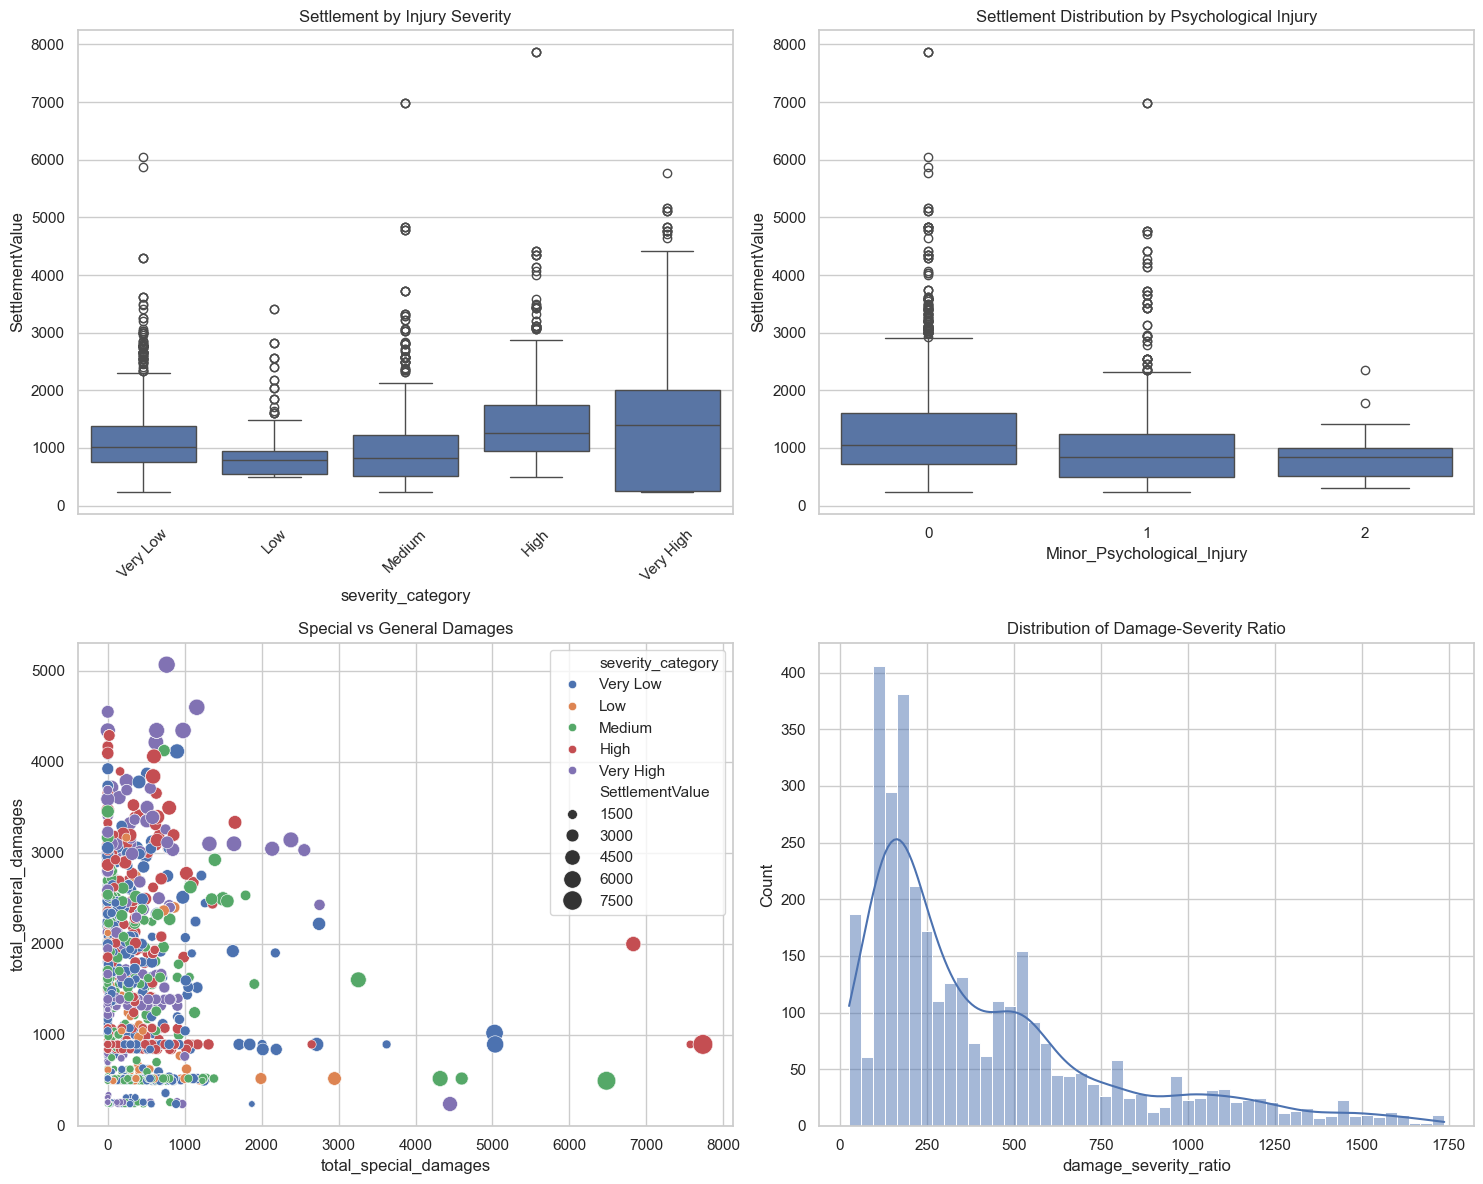

In [40]:
# Create injury severity categories
df['severity_category'] = pd.qcut(df['Injury_Prognosis'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Plot injury patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Settlement by injury severity
sns.boxplot(data=df, x='severity_category', y='SettlementValue', ax=axes[0,0])
axes[0,0].set_title('Settlement by Injury Severity')
axes[0,0].tick_params(axis='x', rotation=45)

# Psychological injury impact
sns.boxplot(data=df, x='Minor_Psychological_Injury', y='SettlementValue', ax=axes[0,1])
axes[0,1].set_title('Settlement Distribution by Psychological Injury')

# Special vs General damages
sns.scatterplot(data=df, x='total_special_damages', y='total_general_damages', 
                hue='severity_category', size='SettlementValue', sizes=(20, 200), ax=axes[1,0])
axes[1,0].set_title('Special vs General Damages')

# Damage ratio distribution
sns.histplot(data=df[df['damage_severity_ratio'] < df['damage_severity_ratio'].quantile(0.95)], 
            x='damage_severity_ratio', bins=50, kde=True, ax=axes[1,1])
axes[1,1].set_title('Distribution of Damage-Severity Ratio')

plt.tight_layout()
plt.show()

## 6. Vehicle and Driver Analysis

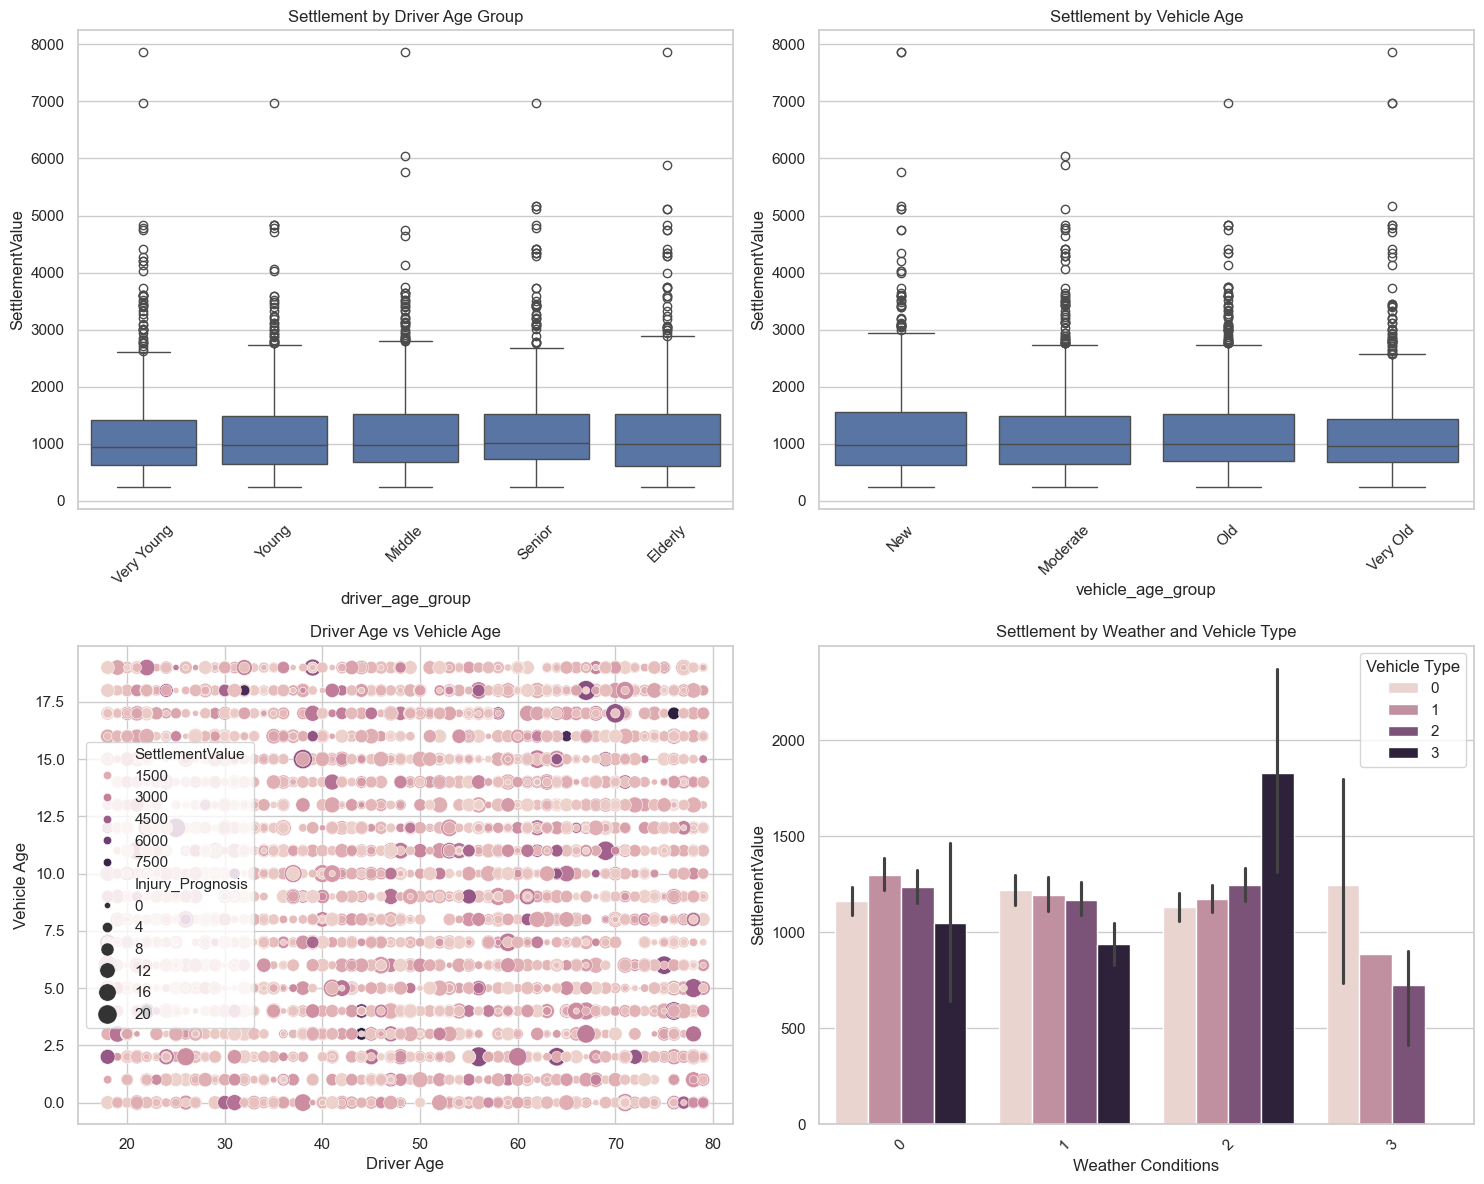

In [41]:
# Create age groups
df['driver_age_group'] = pd.qcut(df['Driver Age'], q=5, labels=['Very Young', 'Young', 'Middle', 'Senior', 'Elderly'])
df['vehicle_age_group'] = pd.qcut(df['Vehicle Age'], q=4, labels=['New', 'Moderate', 'Old', 'Very Old'])

# Plot vehicle and driver patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Settlement by driver age group
sns.boxplot(data=df, x='driver_age_group', y='SettlementValue', ax=axes[0,0])
axes[0,0].set_title('Settlement by Driver Age Group')
axes[0,0].tick_params(axis='x', rotation=45)

# Settlement by vehicle age group
sns.boxplot(data=df, x='vehicle_age_group', y='SettlementValue', ax=axes[0,1])
axes[0,1].set_title('Settlement by Vehicle Age')
axes[0,1].tick_params(axis='x', rotation=45)

# Driver age vs Vehicle age
sns.scatterplot(data=df, x='Driver Age', y='Vehicle Age', 
                hue='SettlementValue', size='Injury_Prognosis', sizes=(20, 200), ax=axes[1,0])
axes[1,0].set_title('Driver Age vs Vehicle Age')

# Average settlement by weather and vehicle type
sns.barplot(data=df, x='Weather Conditions', y='SettlementValue', hue='Vehicle Type', ax=axes[1,1])
axes[1,1].set_title('Settlement by Weather and Vehicle Type')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7. Final Processing and Conclusions

✅ Preprocessed data saved to Cleaned_Patient_Records_preprocessed.csv
Final Dataset Summary:
Total features: 47
Total samples: 3667


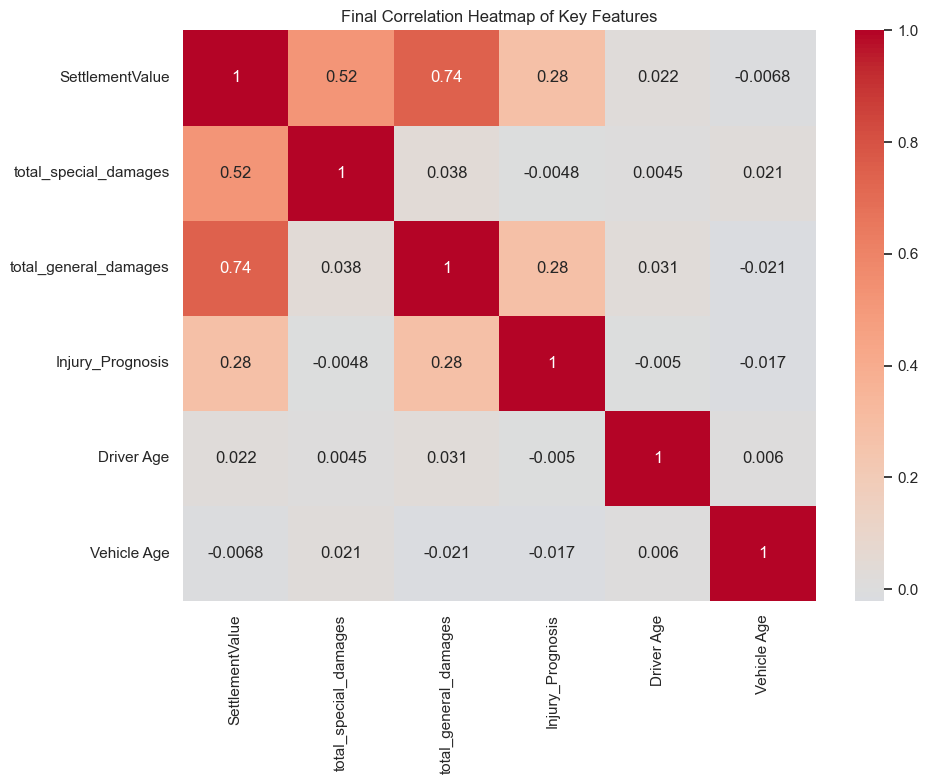

In [43]:
# Handle infinite values and very large numbers
df = df.replace([np.inf, -np.inf], np.nan)

# Fill NaN values for numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Scale numerical features
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Encode categorical variables (excluding datetime column)
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col != 'Accident Date']
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes

# Save preprocessed data
output_path = "Cleaned_Patient_Records_preprocessed.csv"
df.to_csv(output_path, index=False)
print(f"✅ Preprocessed data saved to {output_path}")

# Final summary statistics
print("Final Dataset Summary:")
print(f"Total features: {df.shape[1]}")
print(f"Total samples: {df.shape[0]}")

# Final correlation heatmap
key_features = ['SettlementValue', 'total_special_damages', 'total_general_damages', 
                'Injury_Prognosis', 'Driver Age', 'Vehicle Age']
plt.figure(figsize=(10, 8))
sns.heatmap(df[key_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Final Correlation Heatmap of Key Features')
plt.tight_layout()
plt.show()